# Cyclistic Bike Share Case Study

## Introduction

In this case study we try to explore Cyclistic Bike Share (fictional company) data. The scenario is that our marketing director believes the company's future success depends on maximizing the number of annual memberships. Our team of analyst wants to understand how casual riders and annual members use Cyclistic bikes differently.

## Business objectives

This case study aims to identify patterns related to the usage of Cyclistics Bike services among different group of users. Marketing team wants to design marketing strategies aimed at converting casual riders into annual members.

## Basic Requirements

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# style
sns.set_theme()
rcParams["figure.figsize"] = (12, 6)

### Dataset used for Analysis

- **"tripdata.csv"** as df

Reading file `tripdata.csv`

In [2]:
df = pd.read_csv("../data/processed/tripdata.csv")

## Initial Data Inspection

In [3]:
# show top 5 rows
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,Kingsbury St & Kinzie St,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,Larrabee St & Webster Ave,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,Kingsbury St & Kinzie St,41.948797,-87.675278,41.889177,-87.638506,member


In [4]:
# show bottom 5 rows
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
5860563,BD56BA20F42E4794,electric_bike,2024-12-11 08:23:46.564,2024-12-11 08:37:34.532,Clybourn Ave & Division St,NaN,41.904634,-87.640518,41.880000,-87.630000,member
5860564,3074643A6B60B300,electric_bike,2024-12-09 12:26:15.677,2024-12-09 12:37:32.712,Canal St & Jackson Blvd,NaN,41.878125,-87.639968,41.900000,-87.620000,member
5860565,15602635C5DF484E,electric_bike,2024-12-31 17:10:03.113,2024-12-31 17:17:21.838,Albany Ave & Bloomingdale Ave,California Ave & Milwaukee Ave,41.914027,-87.705126,41.922695,-87.697153,member
5860566,F15ABBA961560B75,electric_bike,2024-12-01 14:39:47.216,2024-12-01 14:45:21.268,Albany Ave & Bloomingdale Ave,California Ave & Milwaukee Ave,41.914003,-87.705099,41.922695,-87.697153,member
5860567,8AF273287533B527,electric_bike,2024-12-17 06:38:32.320,2024-12-17 06:46:27.167,Albany Ave & Bloomingdale Ave,NaN,41.914027,-87.705126,41.920000,-87.690000,member


In [5]:
# dimension of our data
df.shape

(5860568, 11)

In [6]:
# show columns and data types
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860568 entries, 0 to 5860567
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   end_station_name    object 
 6   start_lat           float64
 7   start_lng           float64
 8   end_lat             float64
 9   end_lng             float64
 10  member_casual       object 
dtypes: float64(4), object(7)
memory usage: 2.7 GB


## Prepartion

### Handling missing values

List of columns and null count percentage in descending order.

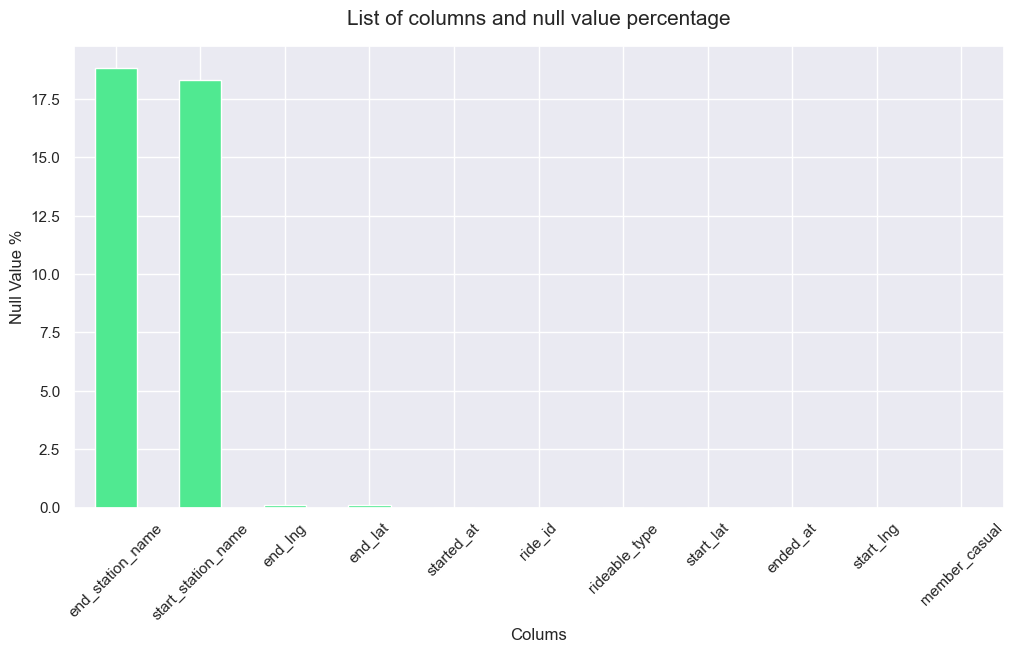

In [7]:
# null count percentage in descending order
null_cols = (df.isna().sum()/len(df) * 100).sort_values(ascending=False)

# plotting null count
fig, ax = plt.subplots()
null_cols.plot(kind="bar", color="#50e991", rot=45)
ax.set_title("List of columns and null value percentage", fontsize=15, pad=15)
ax.set_xlabel("Colums")
ax.set_ylabel("Null Value %")
plt.show();

In [8]:
# column with missing values
null_cols = ["start_station_name", "end_station_name", "end_lat", "end_lng"]

df[null_cols].isna().sum() / len(df) * 100

start_station_name    18.325033
end_station_name      18.848907
end_lat                0.123401
end_lng                0.123401
dtype: float64

We have missing values on some columns like *start_station_name*, *end_station_name*, *end_lat*, and *end_lng* columns. We will delete some of them and impute some with placeholder. Columns *end_lat* and *end_lng* because it has less than 1% of missing values that we can delete and fill the other two columns with placeholder.

In [9]:
# drop missing values
df.dropna(subset=["end_lat", "end_lng"], inplace=True, ignore_index=True)

Impute other two columns *start_station_name* and *end_station_name* with placeholder "Unkown".

In [10]:
# imputing missing values with "Unknown"
df.fillna(
    {
        "start_station_name": "Unknown",
        "end_station_name": "Unknown"
    },
    inplace=True
)

In [11]:
# check again to confirm there is no missing values
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

### Handling duplicates

In [12]:
# check number of duplicate rows based on all columns
df.duplicated().sum()

np.int64(0)

There is no duplicate values in our dataset. But we will further dive deep into subset of dataframe for duplicate values especially *ride_id* column because it contains unique ride details.

### Datatype conversion for better analysis

In [13]:
# datatype conversion
df = df.astype(
    {
        "ride_id": "string",
        "rideable_type": "category",
        "started_at": "datetime64[ns]",
        "ended_at": "datetime64[ns]",
        "start_station_name": "string",
        "end_station_name": "string",
        "member_casual": "category"
    }
)

In [14]:
# confirm data type conversion
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853336 entries, 0 to 5853335
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  string        
 5   end_station_name    string        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), string(3)
memory usage: 1.4 GB


### Create a new variables for analysis

- *ride_length* in minutes
- *distance* in km

We will use **Haversine formula** to find distance between two points.

In [15]:
# latitude and longitude conversion function (Haversine Formula)
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers. Use 3956 for miles. Determines return value units.
    r = 6371
    return c * r

In [16]:
# create new varialbes

# ride duration in minutes
df["ride_length"] = (df["ended_at"] - df["started_at"]).dt.seconds / 60

# cordinates to convert
df_cordinate = df[["start_lat", "start_lng", "end_lat", "end_lng"]] 

# call the function to convert
df["distance"] = df_cordinate.apply(
    lambda x: haversine(x["start_lat"], x["start_lng"], x["end_lat"], x["end_lng"]),
    axis=1,
) 


### Sort data by start date in ascending order

In [17]:
# sort values by start data in ascending order
df.sort_values('started_at', inplace=True, ignore_index=True)

In [18]:
# confirm dataset is sorted
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,distance
0,6A9D809ABDF70617,electric_bike,2024-01-01 00:00:39,2024-01-01 00:07:56,Unknown,Clark St & Wrightwood Ave,41.950000,-87.650000,41.929546,-87.643118,member,7.283333,2.344531
1,26B9F6E416A68EBA,electric_bike,2024-01-01 00:00:50,2024-01-01 00:04:20,Unknown,Unknown,41.900000,-87.620000,41.900000,-87.620000,casual,3.500000,0.000000
2,30EF016A0DF5ECEE,electric_bike,2024-01-01 00:00:52,2024-01-01 00:04:25,Unknown,Unknown,41.900000,-87.620000,41.900000,-87.620000,casual,3.550000,0.000000
3,0D9E85F804C85828,electric_bike,2024-01-01 00:00:53,2024-01-01 00:22:30,Clinton St & Madison St,Unknown,41.881909,-87.641296,41.890000,-87.620000,member,21.616667,1.979208
4,56F5C3ED5178C131,classic_bike,2024-01-01 00:01:01,2024-01-01 00:24:12,LaSalle St & Illinois St,Indiana Ave & Roosevelt Rd,41.890762,-87.631697,41.867888,-87.623041,member,23.183333,2.642502


## Univariate Analysis

### Check uniqueness of ride_id

*ride_id* is a unique id that classify each ride taken by the user. We will check for any duplicates, and if there are any duplicates present, then we will remove those rows.

In [19]:
# check for duplicates
df["ride_id"].duplicated().sum()

np.int64(171)

In [20]:
# drop duplicate ride_id
df.drop_duplicates(subset="ride_id", inplace=True, ignore_index=True)

### Numerical variable analysis

#### List all numerical columns

In [21]:
# find numeric columns
numeric_columns = df.select_dtypes(include="number").columns
numeric_columns

Index(['start_lat', 'start_lng', 'end_lat', 'end_lng', 'ride_length',
       'distance'],
      dtype='object')

Out of all those numerical variables we will analyze *distance* and *ride_length* to find out any erros and outliers. These two variables are crucial for our analysis

##### Analsysis of *distance variable*

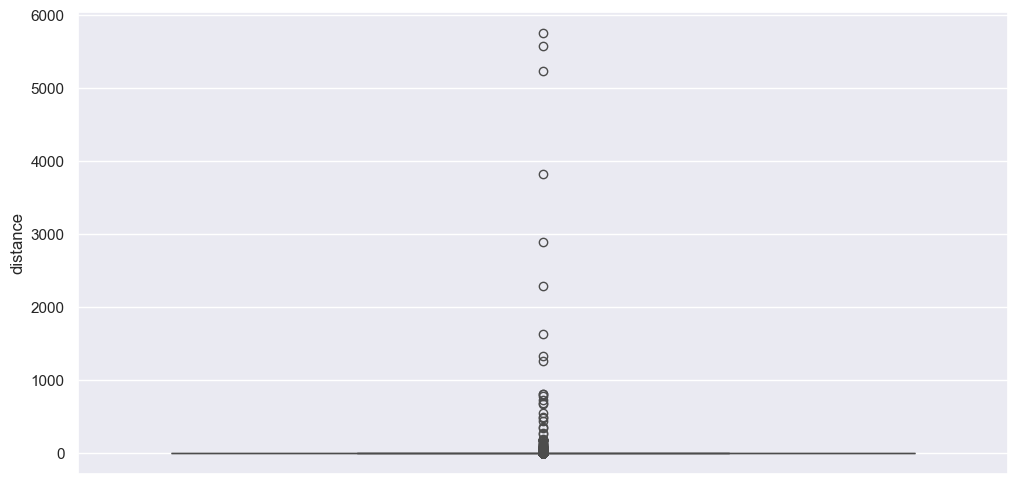

In [22]:
# distance
fig, ax = plt.subplots()
sns.boxplot(df["distance"], ax=ax);

1. The majority of the data points are concentrated near the lower end.
Several extreme outliers exist, extending beyond 1000, reaching up to 6000.

2. The box (interquartile range, IQR) is very small, indicating that most data points are clustered close to each other.
The long upper whisker and extreme values suggest a highly skewed dataset.

3. The large outliers could be due to errors in data entry or incorrect unit conversions (e.g., meters instead of kilometers).
Unrealistic distance values might suggest GPS errors or anomalies in tracking.


I will use IQR method to handle outliers in distance varialble.

In [23]:
# filter dataframe based on IQR

Q1 = df["distance"].quantile(0.25)
Q3 = df["distance"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df["distance"] >= lower_bound) & (df["distance"] <= upper_bound)]

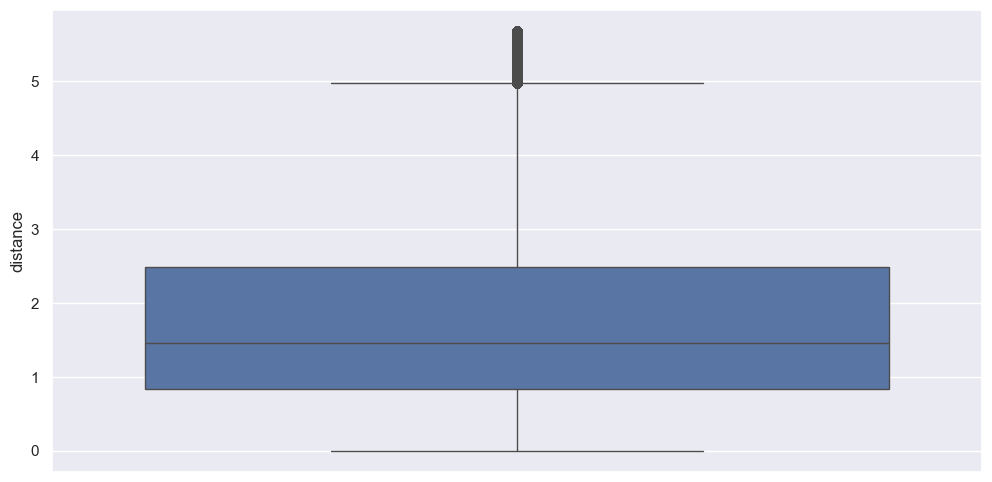

In [24]:
# visualize and confirm
fig, ax = plt.subplots()
sns.boxplot(df_filtered["distance"], ax=ax);

##### Analysis of *ride_length*

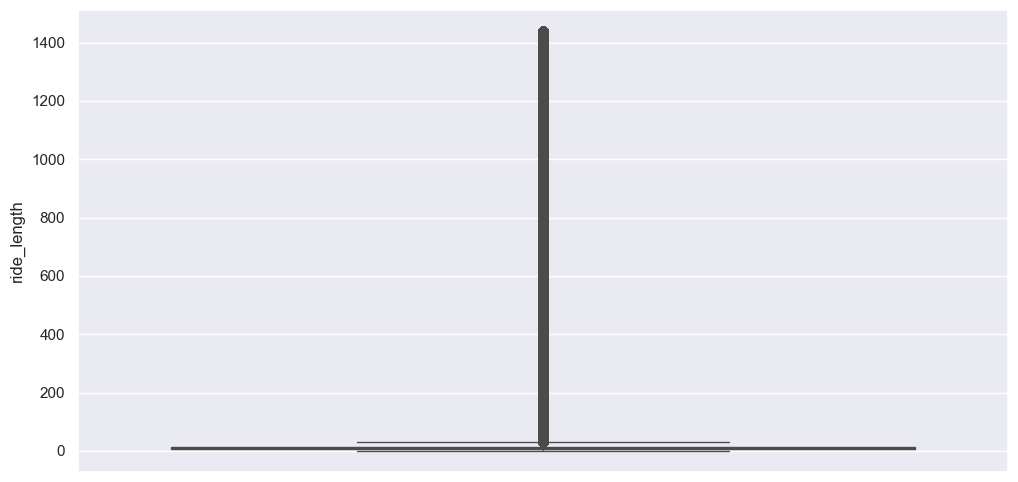

In [25]:
# visualize outliers
fig, ax = plt.subplots()
sns.boxplot(df_filtered["ride_length"], ax=ax);

1. The boxplot shows several extreme outliers in the ride_length data, including some with very large negative values.
2. The main box (interquartile range) is compressed near the top, suggesting that most data points are tightly clustered within a small range.
3. Ride lengths should generally be positive, so negative values suggest possible data entry errors or incorrect calculations.
4. The presence of extreme outliers suggests that the data distribution is heavily skewed.
5. The extremely large values may indicate data quality issues, such as incorrect data entry or unit errors.

I will use IQR method to handle outliers in ride_length variable.

In [26]:
# filter dataframe based on IQR
Q1 = df_filtered["ride_length"].quantile(0.25)
Q3 = df_filtered["ride_length"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df_filtered[
    (df_filtered["ride_length"] >= lower_bound) & (df_filtered["ride_length"] <= upper_bound)
]


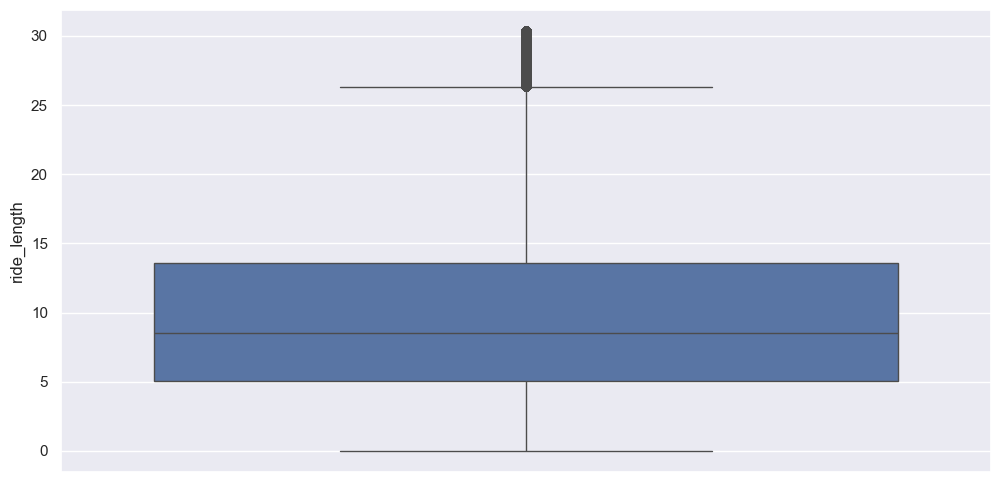

In [27]:
# visualize and confirm
fig, ax = plt.subplots()
sns.boxplot(df_filtered["ride_length"], ax=ax);

### Categorical variables

##### Frequency of *rideable_type*

In [28]:
# frequency of ride type
df_filtered["rideable_type"].value_counts(normalize=True)

rideable_type
electric_bike       0.520537
classic_bike        0.452600
electric_scooter    0.026863
Name: proportion, dtype: float64

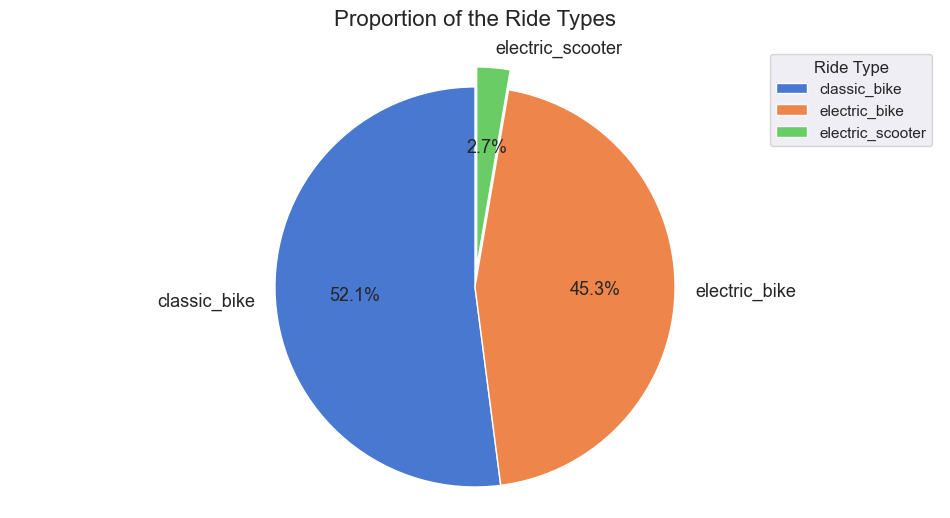

In [29]:
# visualization of ride type proportion

ride_category = df_filtered["rideable_type"].value_counts(normalize=True)

fig, ax = plt.subplots()
colors = sns.color_palette("muted")
explode = (0, 0, 0.1)
ride_category.plot(
    ax=ax,
    kind="pie",
    labels=ride_category.index.values.categories,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    legend=True,
    explode=explode,
    textprops={"fontsize": 13},
)
ax.axis("equal")
ax.set_ylabel("")
ax.set_title("Proportion of the Ride Types", fontsize=16, pad=15)
ax.legend(title="Ride Type")
plt.show()


##### Frequency of *member_casual*

In [30]:
# frequency of different riders
df_filtered["member_casual"].value_counts(normalize=True)

member_casual
member    0.658529
casual    0.341471
Name: proportion, dtype: float64

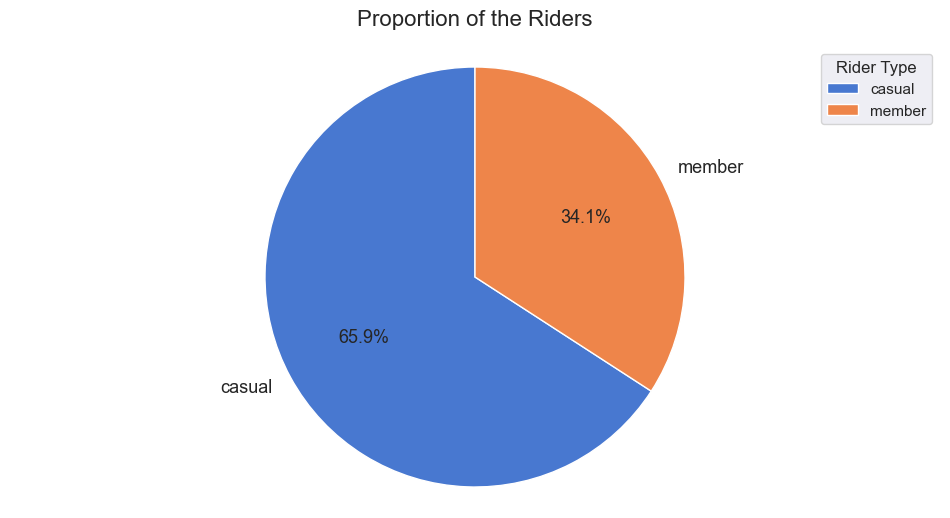

In [31]:
# visualization of proportion of the Riders
riders_type = df_filtered["member_casual"].value_counts(normalize=True)

fig, ax = plt.subplots()
colors = sns.color_palette("muted")
riders_type.plot(
    ax=ax,
    kind="pie",
    labels=riders_type.index.values.categories,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    legend=True,
    textprops={"fontsize": 13},
)
ax.axis("equal")
ax.set_ylabel("")
ax.set_title("Proportion of the Riders", fontsize=16, pad=15)
ax.legend(title="Rider Type")
plt.show()

### String Variables

##### Analysis of *start_station_name* and *end_station_name*.

I have filtered out "Unknown" station name from this bar chart to clearly see other busiest stations. Bar chart is showing top 50 busiest station where customers start their journey other than Unkown stations.

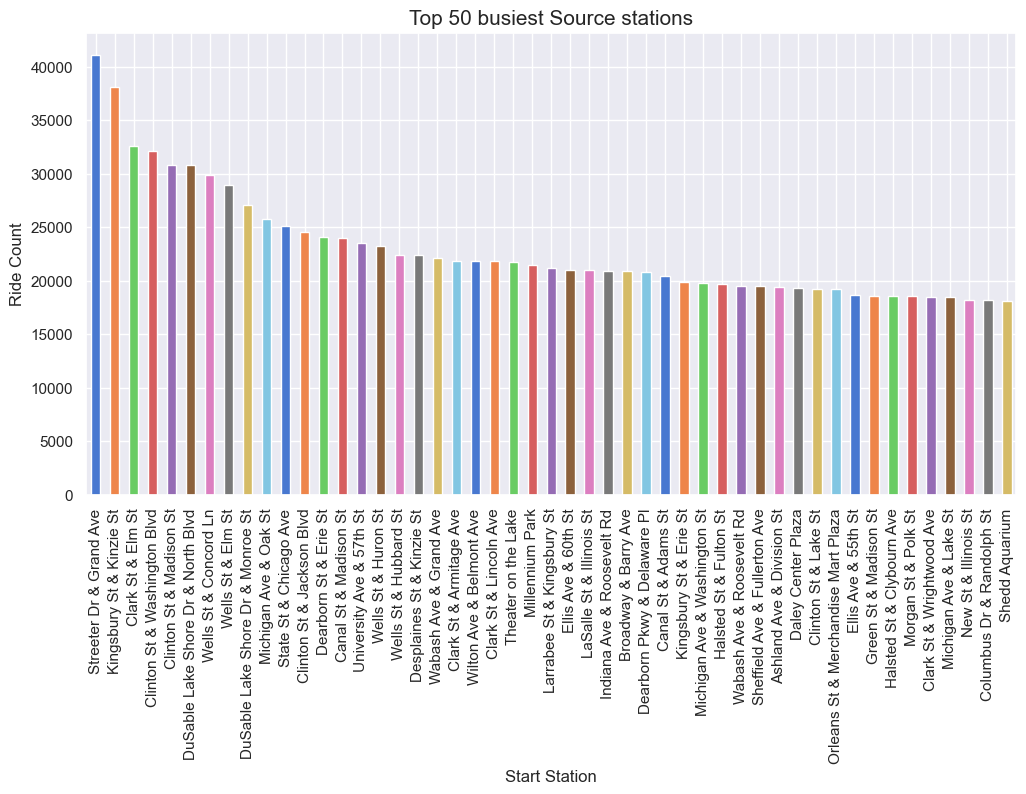

In [32]:
# visualization of popular start stations
fig, ax = plt.subplots()
colors = sns.color_palette("muted")

source_stations = df_filtered["start_station_name"].value_counts().iloc[1:50]
source_stations.plot(
    ax=ax,
    kind="bar",
    color=colors,
)
ax.set_title("Top 50 busiest Source stations", fontsize=15)
ax.set_xlabel("Start Station", fontsize=12)
ax.set_ylabel("Ride Count", fontsize=12)
plt.show()


I have filtered out "Unknown" station name from this bar chart to clearly see other busiest stations. Bar chart is showing top 50 busiest customer destination stations.

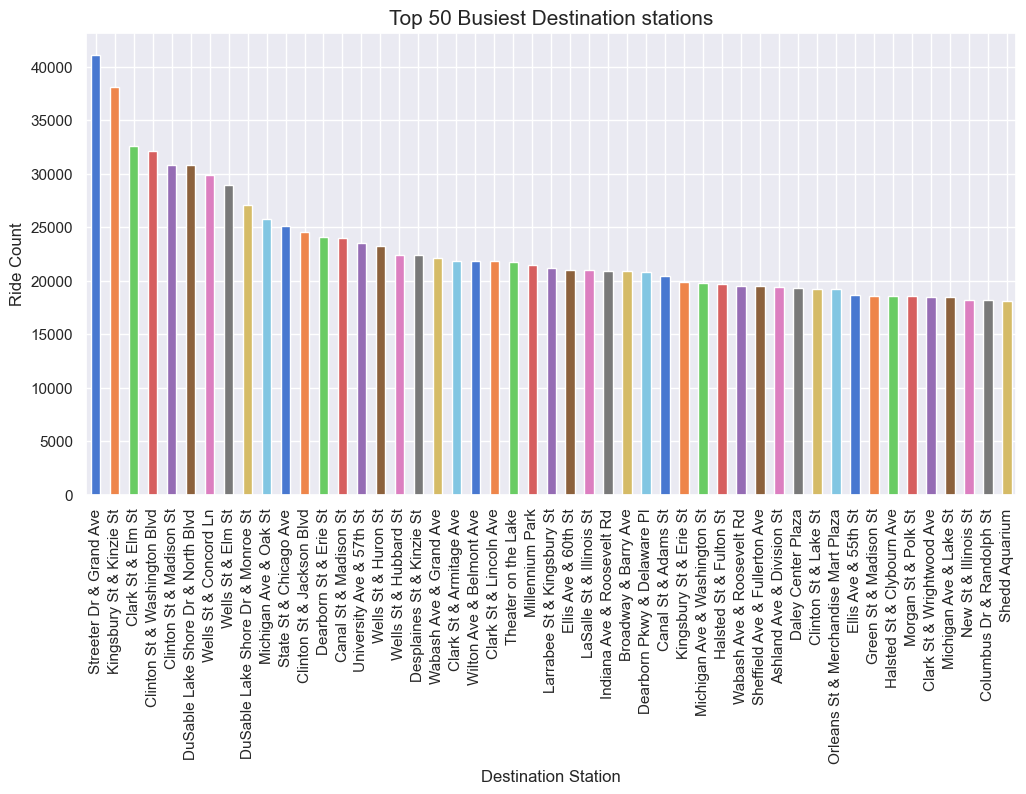

In [33]:
# visualization of popular destianations
fig, ax = plt.subplots()
colors = sns.color_palette("muted")

destination_stations = df_filtered["end_station_name"].value_counts().iloc[1:50]
source_stations.plot(
    ax=ax,
    kind="bar",
    color=colors,
)
ax.set_title("Top 50 Busiest Destination stations", fontsize=15)
ax.set_xlabel("Destination Station", fontsize=12)
ax.set_ylabel("Ride Count", fontsize=12)
plt.show()

### Timestamp variables

Time analysis with respect to month, quarter, weekday and hour. 

##### Month by Month ride counts

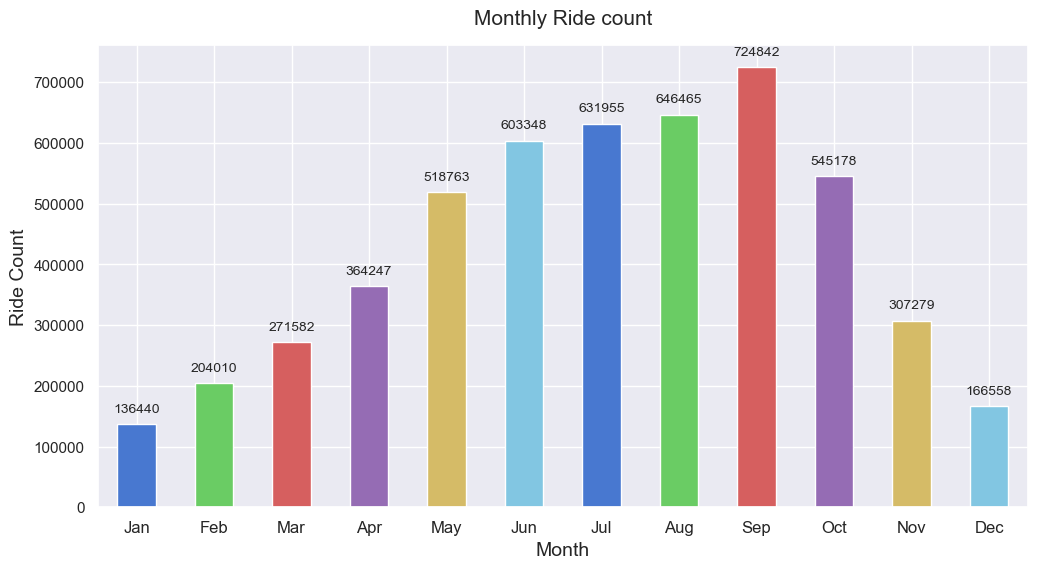

In [34]:
# monthly ride counts
fig, ax = plt.subplots()
colors = sns.color_palette("muted6")

grouped_month = df_filtered.groupby(df_filtered["started_at"].dt.month)[
    "ride_id"
].count()

grouped_month.plot(ax=ax, kind="bar", color=colors, rot=0)
ax.set_title("Monthly Ride count", fontsize=15, pad=15)
ax.set_xlabel("Month", fontsize=14)
ax.set_xticklabels(
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
    fontsize=12,
)
ax.set_ylabel("Ride Count", fontsize=14)
for index, value in enumerate(
    df_filtered.groupby(df_filtered["started_at"].dt.month)["ride_id"].count()
):
    plt.text(index, value + 20000, str(value), ha="center", fontsize=10)
plt.show()


##### Quarter by Quarter ride counts

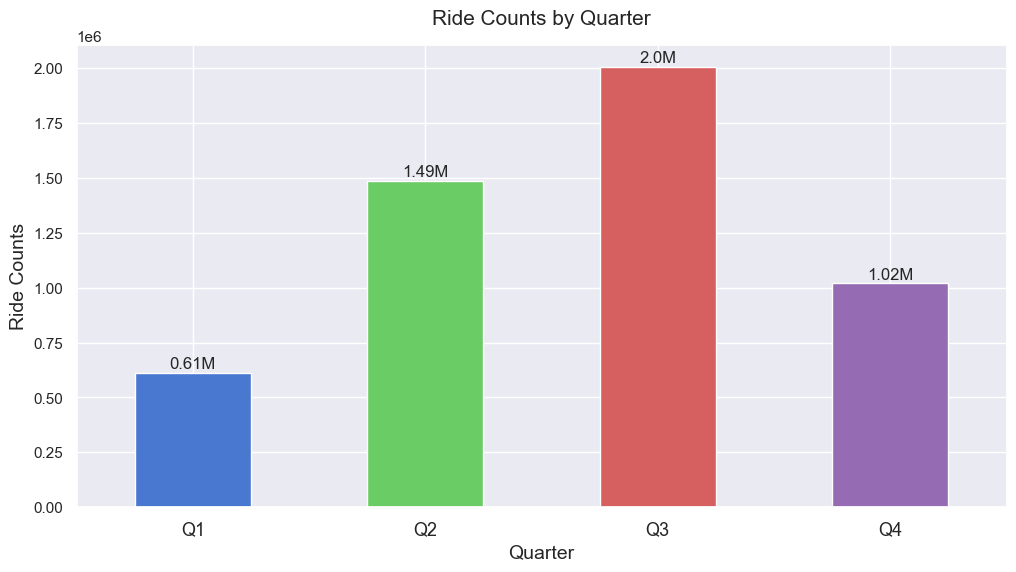

In [35]:
# quarter ride counts
grouped_quater = df_filtered.groupby(df_filtered["started_at"].dt.quarter)[
    "ride_id"
].count()

fig, ax = plt.subplots()
colors = sns.color_palette("muted6")
grouped_quater.plot(ax=ax, kind="bar", rot=0, color=colors)
ax.set_title("Ride Counts by Quarter", fontsize=15, pad=15)
ax.set_xticklabels(["Q1", "Q2", "Q3", "Q4"], fontsize=13)
ax.set_xlabel("Quarter", fontsize=14)
ax.set_ylabel("Ride Counts", fontsize=14)

for index, value in enumerate(
    df_filtered.groupby(df_filtered["started_at"].dt.quarter)["ride_id"].count()
):
    plt.text(
        index,
        value + 20000,
        str(round(value / 1000000, 2)) + "M",
        ha="center",
        fontsize=12,
    )
plt.show()


##### Monthly ride counts by day of the week

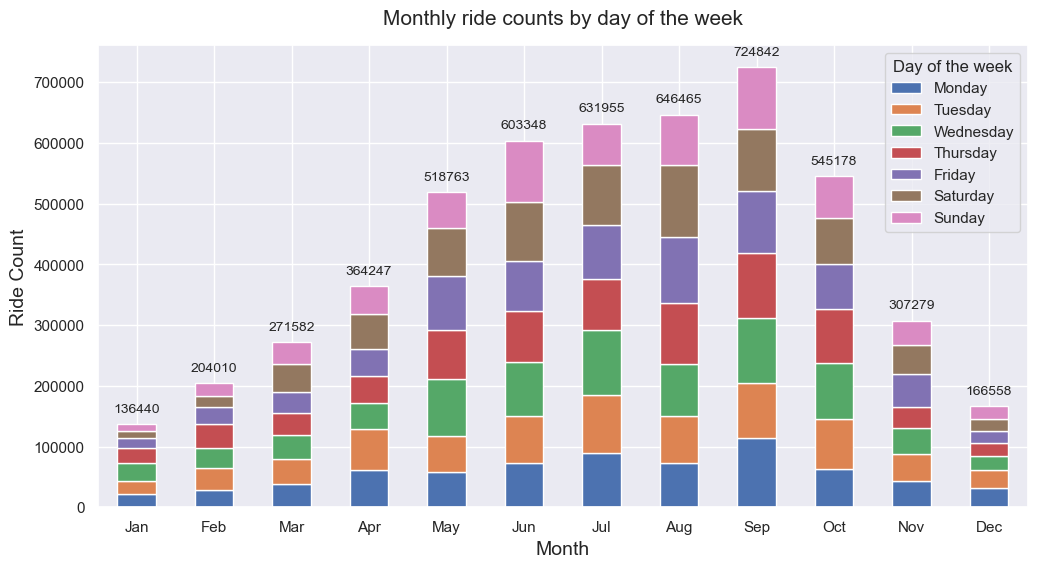

In [36]:
# monthly ride counts by day of the week
grouped_month_week = df_filtered.groupby(
    [df_filtered["started_at"].dt.month, df_filtered["started_at"].dt.weekday]
)["ride_id"].count()

fig, ax = plt.subplots()
grouped_month_week.unstack().plot(kind="bar", stacked=True, rot=0, legend=True, ax=ax)
ax.legend(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    title="Day of the week",
)
ax.set_title("Monthly ride counts by day of the week", fontsize=15, pad=15)
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Ride Count", fontsize=14)
ax.set_xticklabels(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
for index, value in enumerate(
    df_filtered.groupby(df_filtered["started_at"].dt.month)["ride_id"].count()
):
    plt.text(index, value + 20000, str(value), ha="center", fontsize=10)
plt.show()


## Bivariate analysis

##### Monthly ride counts with respect to Riders

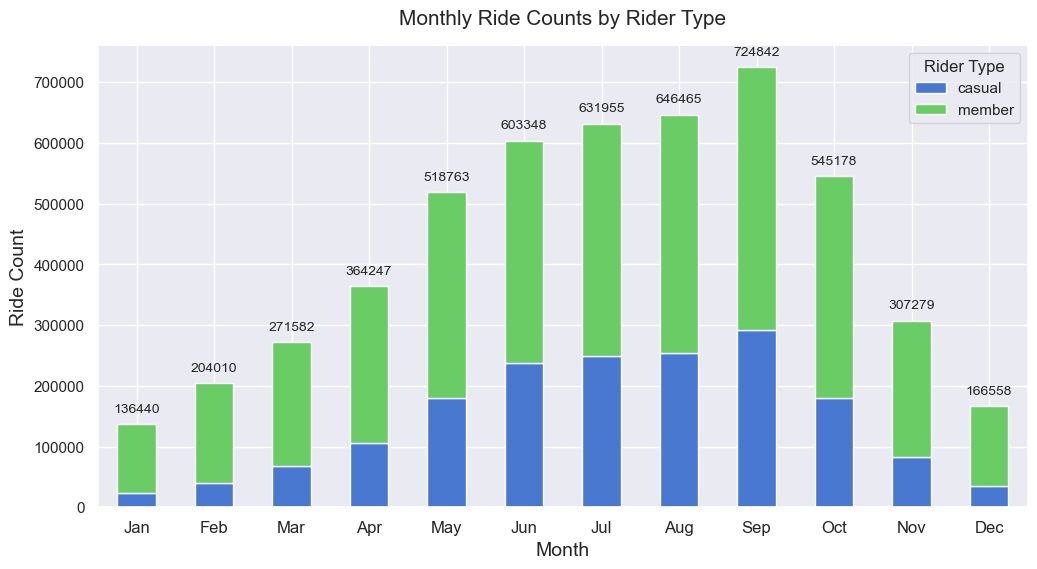

In [37]:
# monthly ride counts by riders
grouped_month_riders = df_filtered.groupby(
    [df_filtered["started_at"].dt.month, df_filtered["member_casual"]], observed=True
)["ride_id"].count()
fig, ax = plt.subplots()
colors = sns.color_palette("muted6")
grouped_month_riders.unstack().plot(ax=ax, kind="bar", stacked=True, rot=0, legend=True, color=colors)
ax.set_title("Monthly Ride Counts by Rider Type", fontsize=15, pad=15)
ax.set_xticklabels(
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
    fontsize=12,
)
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Ride Count", fontsize=14)
ax.legend(title="Rider Type")
for index, value in enumerate(
    df_filtered.groupby(df_filtered["started_at"].dt.month)["ride_id"].count()
):
    plt.text(index, value + 20000, str(value), ha="center", fontsize=10)
plt.show()

##### Quarterly ride counts with respect to Riders

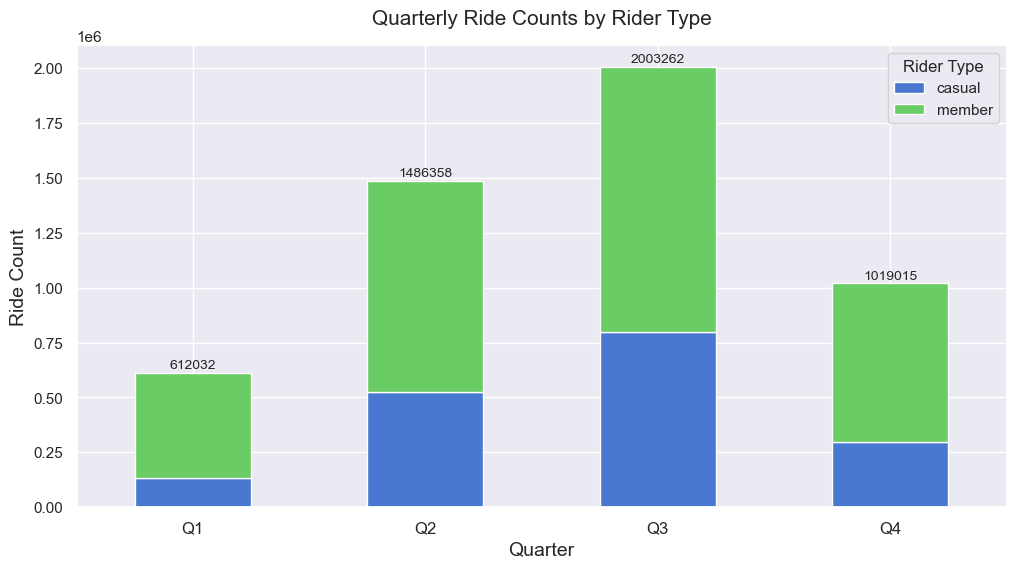

In [38]:
# Quarterly ride counts by riders
grouped_quarter_riders = df_filtered.groupby(
    [df_filtered["started_at"].dt.quarter, df_filtered["member_casual"]], observed=True
)["ride_id"].count()
fig, ax = plt.subplots()
colors = sns.color_palette("muted6")
grouped_quarter_riders.unstack().plot(
    ax=ax, kind="bar", stacked=True, rot=0, legend=True, color=colors
)
ax.set_title("Quarterly Ride Counts by Rider Type", fontsize=15, pad=15)
ax.set_xticklabels(
    ["Q1", "Q2", "Q3", "Q4"],
    fontsize=12,
)
ax.set_xlabel("Quarter", fontsize=14)
ax.set_ylabel("Ride Count", fontsize=14)
ax.legend(title="Rider Type")
for index, value in enumerate(
    df_filtered.groupby(df_filtered["started_at"].dt.quarter)["ride_id"].count()
):
    plt.text(index, value + 20000, str(value), ha="center", fontsize=10)
plt.show()


##### Weekly ride counts with respect to Riders

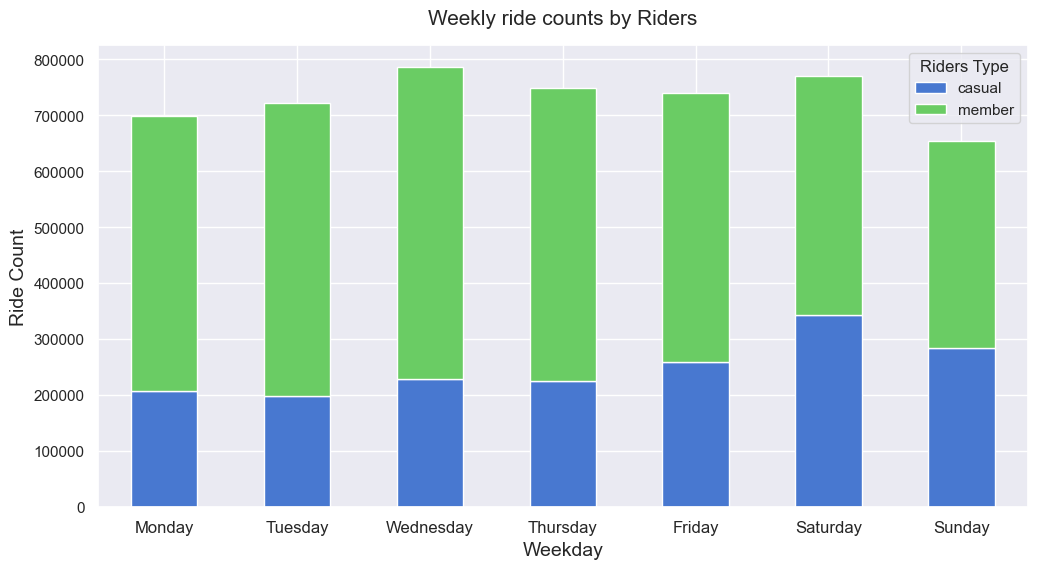

In [39]:
# Weekly ride counts by riders
grouped_week_rider = df_filtered.groupby(
    [df_filtered["started_at"].dt.weekday, df_filtered["member_casual"]], observed=True
)["ride_id"].count()

fig, ax = plt.subplots()
colors = sns.color_palette("muted6")
grouped_week_rider.unstack().plot(
    ax=ax,
    kind="bar",
    stacked=True,
    rot=0,
    color=colors
)
ax.set_title("Weekly ride counts by Riders", fontsize=15, pad=15)
ax.set_xticklabels([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
], fontsize=12)
ax.set_xlabel("Weekday", fontsize=14)
ax.set_ylabel("Ride Count", fontsize=14)
ax.legend(title="Riders Type")
plt.show()

##### Hourly ride counts with respect to Riders

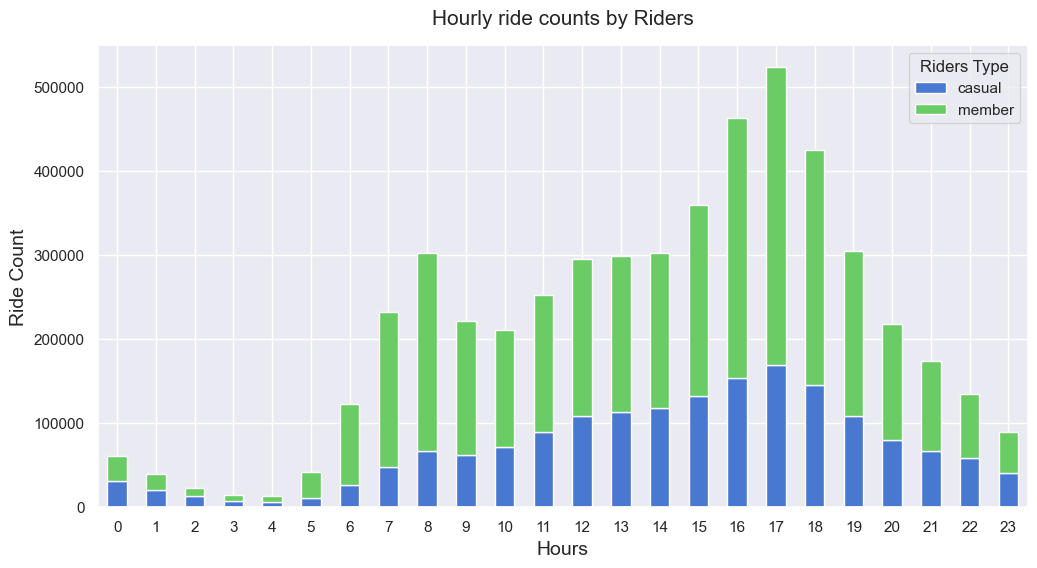

In [40]:
# Hourly ride counts by riders
grouped_hour_rider = df_filtered.groupby(
    [df_filtered["started_at"].dt.hour, df_filtered["member_casual"]], observed=True
)["ride_id"].count()

fig, ax = plt.subplots()
colors = sns.color_palette("muted6")
grouped_hour_rider.unstack().plot(ax=ax, kind="bar", stacked=True, rot=0, color=colors)
ax.set_title("Hourly ride counts by Riders", fontsize=15, pad=15)
ax.set_xlabel("Hours", fontsize=14)
ax.set_ylabel("Ride Count", fontsize=14)
ax.legend(title="Riders Type")
plt.show()


##### Different Ride types with respect to Riders

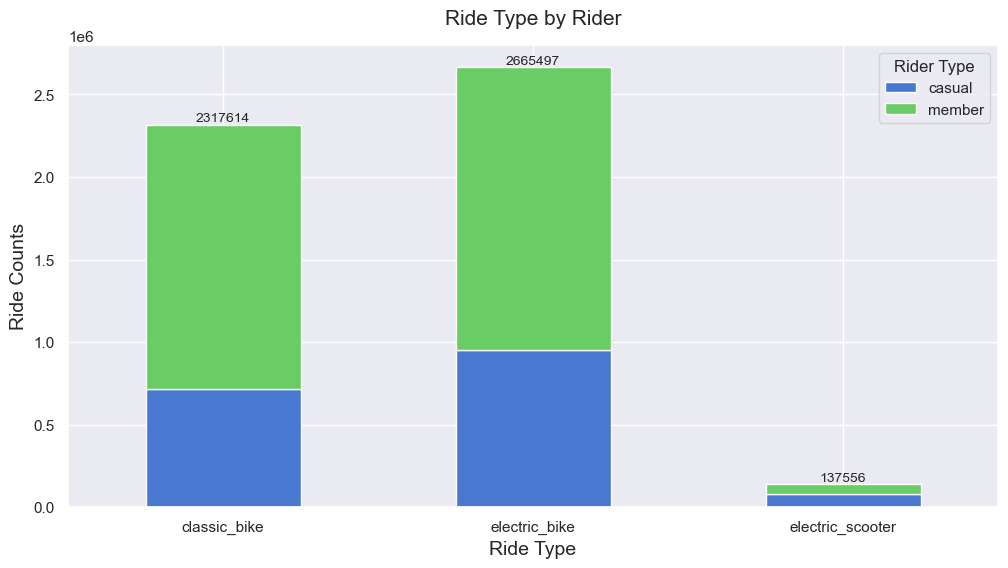

In [41]:
grouped_bike_rider = df_filtered.groupby([df_filtered["rideable_type"], df_filtered["member_casual"]], observed=True)["ride_id"].count()

fig, ax = plt.subplots()
colors = sns.color_palette("muted6")
grouped_bike_rider.unstack().plot(
    ax=ax,
    kind="bar",
    stacked=True,
    rot=0,
    color=colors
)
ax.set_title("Ride Type by Rider", fontsize=15, pad=15)
ax.set_xlabel("Ride Type", fontsize=14)
ax.set_ylabel("Ride Counts", fontsize=14)
ax.legend(title="Rider Type")

for index, value in enumerate(
    df_filtered.groupby(df_filtered["rideable_type"], observed=True)["ride_id"].count()
):
    plt.text(index, value + 20000, str(value), ha="center", fontsize=10)
plt.show()

##### Popular start stations with respect to Riders

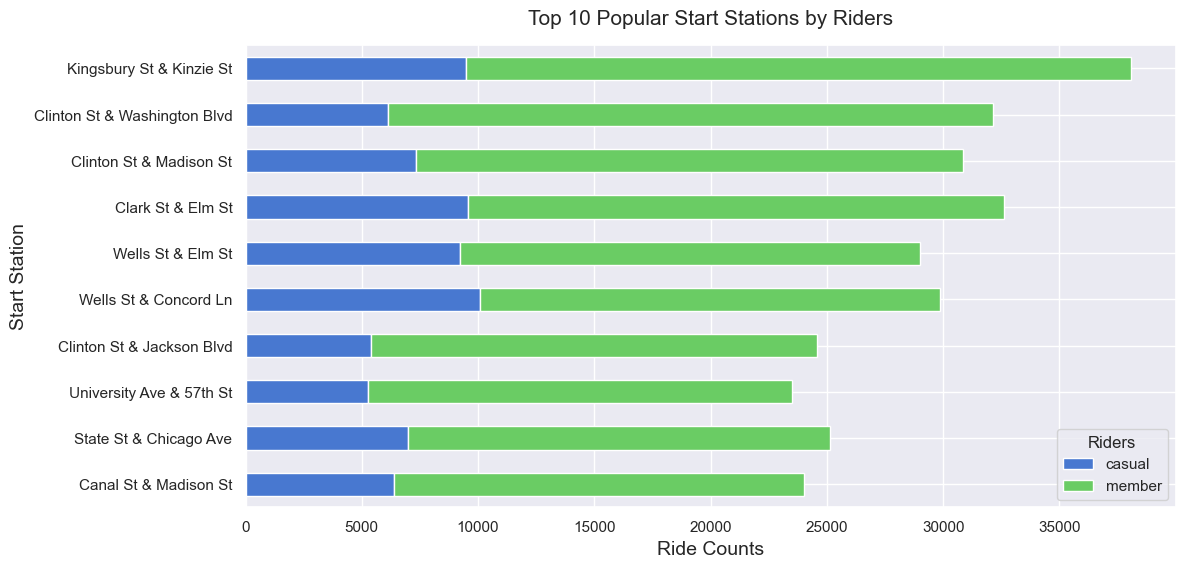

In [42]:
grouped_start_station_rider = df_filtered.groupby([df_filtered["start_station_name"], df_filtered["member_casual"]], observed=True)["ride_id"].count().sort_values(ascending=False)

fig, ax = plt.subplots()
colors = sns.color_palette("muted6")
grouped_start_station_rider.unstack().sort_values(by="member", ascending=False).iloc[1:11].sort_values(by="member").plot(
    ax=ax,
    kind="barh",
    stacked=True,
    color=colors,
)
ax.set_title("Top 10 Popular Start Stations by Riders", fontsize=15, pad=15)
ax.set_ylabel("Start Station", fontsize=14)
ax.set_xlabel("Ride Counts", fontsize=14)
ax.legend(title="Riders")
plt.show()

##### Popular destinations with respect to Riders

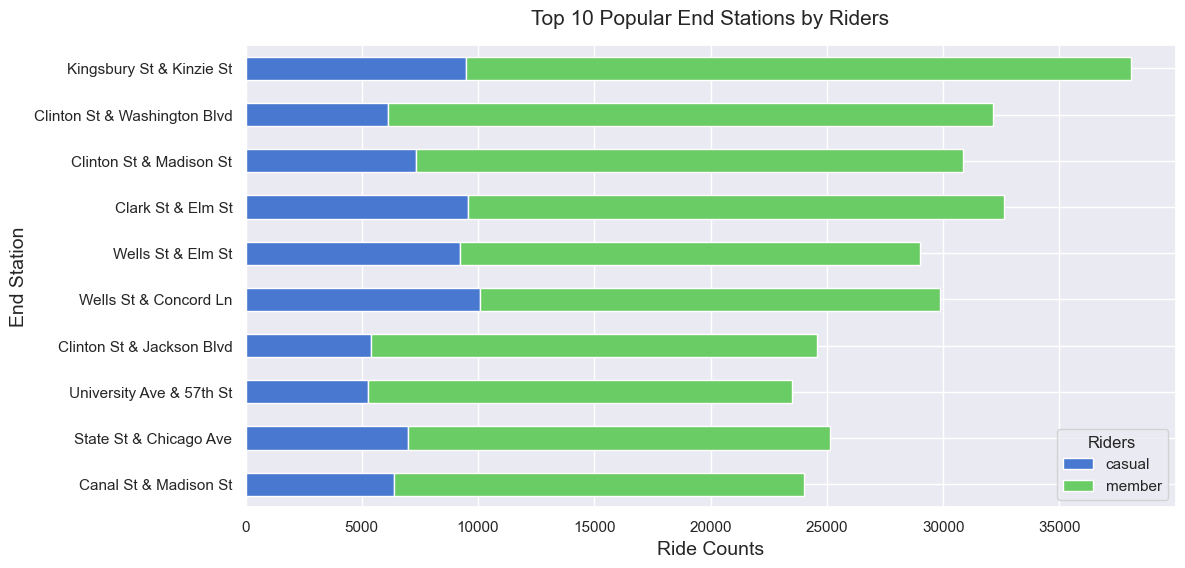

In [43]:
grouped_end_station_rider = (
    df_filtered.groupby(
        [df_filtered["end_station_name"], df_filtered["member_casual"]], observed=True
    )["ride_id"]
    .count()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots()
colors = sns.color_palette("muted6")
grouped_start_station_rider.unstack().sort_values(by="member", ascending=False).iloc[
    1:11
].sort_values(by="member").plot(
    ax=ax,
    kind="barh",
    stacked=True,
    color=colors,
)
ax.set_title("Top 10 Popular End Stations by Riders", fontsize=15, pad=15)
ax.set_ylabel("End Station", fontsize=14)
ax.set_xlabel("Ride Counts", fontsize=14)
ax.legend(title="Riders")
plt.show()


### Continuous Variables

##### Ride Length with respect to Riders

In [44]:
# compute bins for ride length
bins = [0, 10, 20, 30, 40]
labels = ["<10", "10-20", "20-30", "30-40"]

df_filtered["ride_length_category"] = pd.cut(
    df_filtered["ride_length"], bins, labels=labels
)


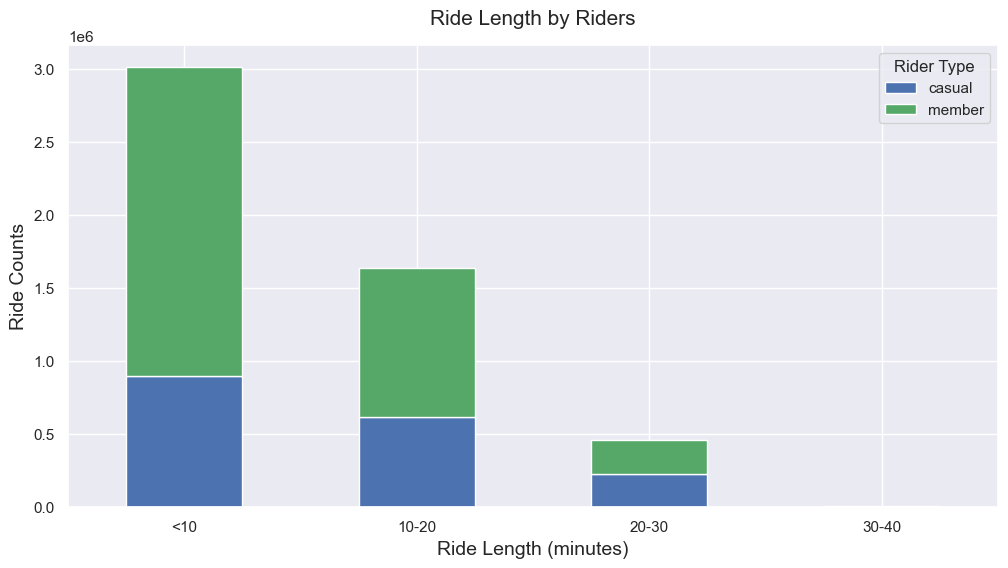

In [45]:
# Visualization of ride length wrt riders
grouped_length_rider = df_filtered.groupby(
    [df_filtered["ride_length_category"], df_filtered["member_casual"]], observed=True
)["ride_id"].count()

fig, ax = plt.subplots()
colors = sns.color_palette("deep6")
grouped_length_rider.unstack().plot(
    ax=ax, kind="bar", stacked=True, rot=0, color=colors
)
ax.set_title("Ride Length by Riders", fontsize=15, pad=15)
ax.set_xlabel("Ride Length (minutes)", fontsize=14)
ax.set_ylabel("Ride Counts", fontsize=14)
ax.legend(title="Rider Type")
plt.show()


##### Distance with respect to Riders

In [46]:
# compute bins for distance
bins = [0, 1, 2, 3, 4, 5, 6]
labels = ["<1", "1-2", "2-3", "3-4", "4-5", "5+"]

df_filtered["ride_distance_category"] = pd.cut(
    df_filtered["distance"], bins, labels=labels, right=False
)

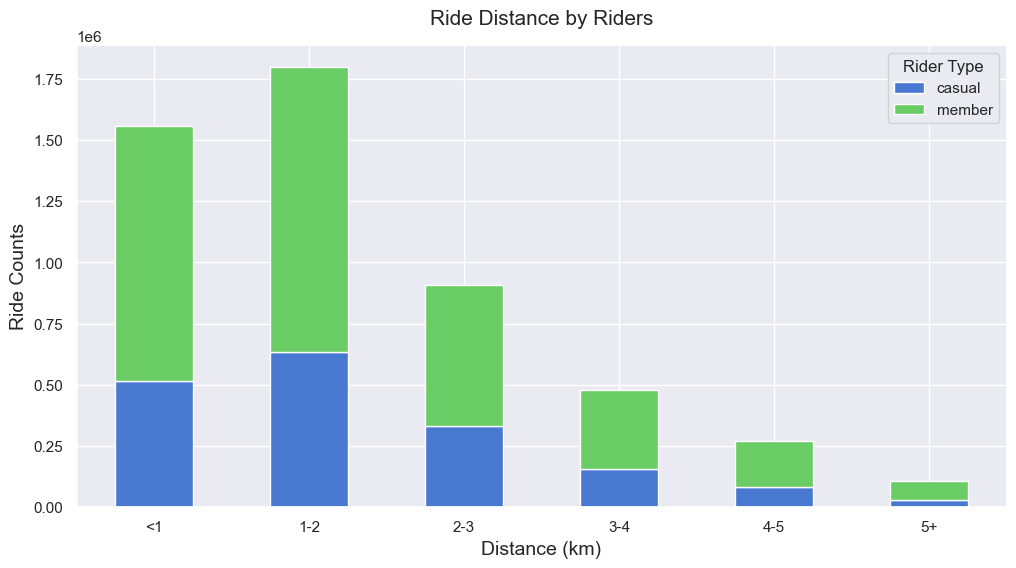

In [47]:
# Visualization of distance wrt riders
grouped_distance_rider = df_filtered.groupby(
    [df_filtered["ride_distance_category"], df_filtered["member_casual"]], observed=True
)["ride_id"].count()

fig, ax = plt.subplots()
colors = sns.color_palette("muted6")
grouped_distance_rider.unstack().plot(
    ax=ax, kind="bar", stacked=True, rot=0, color=colors
)
ax.set_title("Ride Distance by Riders", fontsize=15, pad=15)
ax.set_xlabel("Distance (km)", fontsize=14)
ax.set_ylabel("Ride Counts", fontsize=14)
ax.legend(title="Rider Type")
plt.show()